In [30]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

import warnings
warnings.filterwarnings("ignore")

In [31]:
# read csv
data = pd.read_csv('marketing_AB.csv')

In [32]:
# Make our data visible
data.head()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


In [33]:
# Check for duplicate in our unique identifier
data.duplicated('user id').sum()

0

In [34]:
# drop irrelevant columns
data.drop(['Unnamed: 0', 'user id'], axis=1, inplace=True)

In [35]:
# display new columns list
data.columns

Index(['test group', 'converted', 'total ads', 'most ads day',
       'most ads hour'],
      dtype='object')

In [36]:
# check for the number of unique values in each column
data_cat = data[['test group', 'converted', 'most ads day', 'most ads hour']]
data_cat.nunique()

test group        2
converted         2
most ads day      7
most ads hour    24
dtype: int64

In [37]:
# display our unique values
for i in data_cat:
    print(i.upper(), ":", data_cat[i].unique())

TEST GROUP : ['ad' 'psa']
CONVERTED : [False  True]
MOST ADS DAY : ['Monday' 'Tuesday' 'Friday' 'Saturday' 'Wednesday' 'Sunday' 'Thursday']
MOST ADS HOUR : [20 22 18 10 14 13 19 11 12 16 21  3 23  4  8  0  2 15  1  6 17  7  9  5]


# UNIVARIATE ANALYSIS

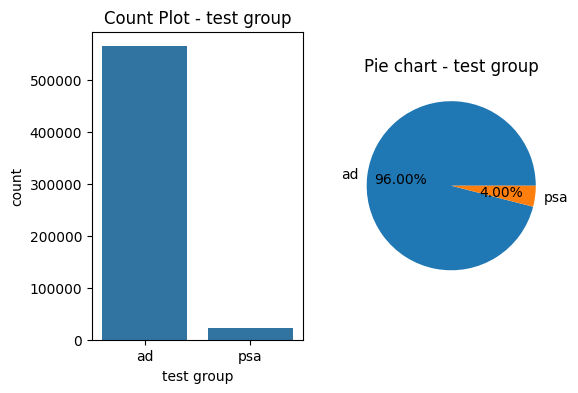

In [38]:
var = 'test group'

plt.figure(figsize=(6, 4))
# count plot
plt.subplot(1, 2, 1)
sns.countplot(x=var, data=data_cat)
plt.title(f"Count Plot - {var}")

# pie chart
plt.subplot(1, 2, 2)
counts = data_cat[var].value_counts()
plt.pie(counts, labels=counts.index, autopct='%0.2f%%')
plt.title(f"Pie chart - {var}")

# adjust layout
plt.tight_layout

# display plots
plt.show()

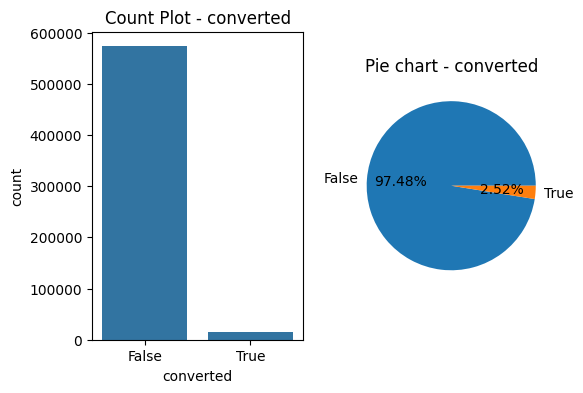

In [39]:
var = 'converted'

plt.figure(figsize=(6, 4))
# count plot
plt.subplot(1, 2, 1)
sns.countplot(x=var, data=data_cat)
plt.title(f"Count Plot - {var}")

# pie chart
plt.subplot(1, 2, 2)
counts = data_cat[var].value_counts()
plt.pie(counts, labels=counts.index, autopct='%0.2f%%')
plt.title(f"Pie chart - {var}")

# adjust layout
plt.tight_layout

# display plots
plt.show()

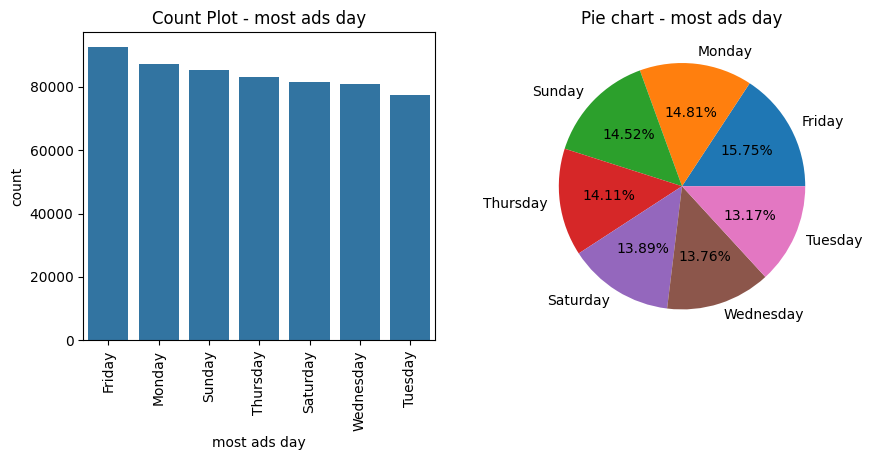

In [40]:
var = 'most ads day'

plt.figure(figsize=(10, 4))
# count plot
plt.subplot(1, 2, 1)
sns.countplot(x=var, data=data_cat, order=data_cat['most ads day'].value_counts().index)
plt.title(f"Count Plot - {var}")
plt.xticks(rotation= 90)

# pie chart
plt.subplot(1, 2, 2)
counts = data_cat[var].value_counts()
plt.pie(counts, labels=counts.index, autopct='%0.2f%%')
plt.title(f"Pie chart - {var}")

# adjust layout
plt.tight_layout

# display plots
plt.show()

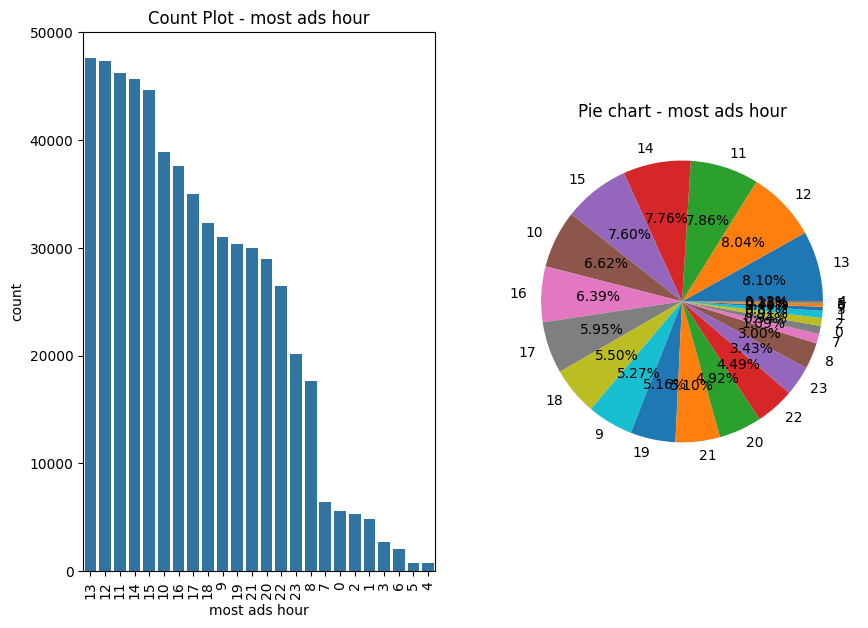

In [41]:
var = 'most ads hour'

plt.figure(figsize=(10, 7))
# count plot
plt.subplot(1, 2, 1)
sns.countplot(x=var, data=data_cat, order=data_cat['most ads hour'].value_counts().index)
plt.title(f"Count Plot - {var}")
plt.xticks(rotation= 90)

# pie chart
plt.subplot(1, 2, 2)
counts = data_cat[var].value_counts()
plt.pie(counts, labels=counts.index, autopct='%0.2f%%')
plt.title(f"Pie chart - {var}")

# adjust layout
plt.tight_layout

# display plots
plt.show()

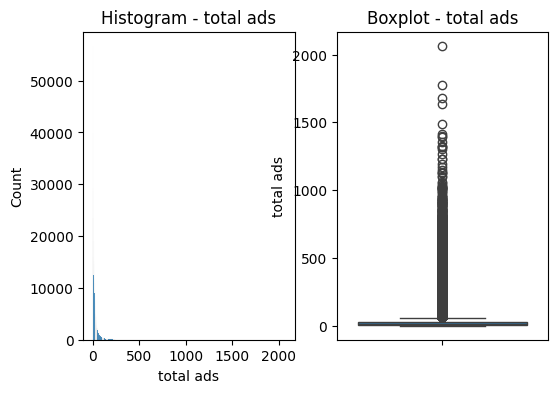

In [42]:
var = 'total ads'

plt.figure(figsize=(6, 4))
# count plot
plt.subplot(1, 2, 1)
sns.histplot(x=var, data=data)
plt.title(f"Histogram - {var}")


# boxplot
plt.subplot(1, 2, 2)
sns.boxplot(y = var, data=data)
plt.title(f"Boxplot - {var}")

# adjust layout
plt.tight_layout

# display plots
plt.show()

In [43]:
# let's check the descriptive part of the variable
data['total ads'].describe()

count    588101.000000
mean         24.820876
std          43.715181
min           1.000000
25%           4.000000
50%          13.000000
75%          27.000000
max        2065.000000
Name: total ads, dtype: float64

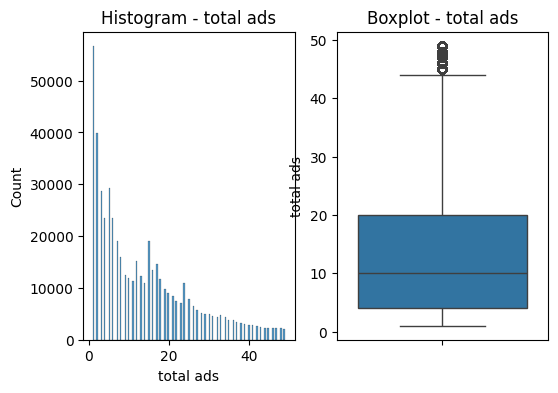

In [44]:
var = 'total ads'

plt.figure(figsize=(6, 4))
# count plot
plt.subplot(1, 2, 1)
sns.histplot(x=var, data=data[data['total ads'] < 50])
plt.title(f"Histogram - {var}")


# boxplot
plt.subplot(1, 2, 2)
sns.boxplot(y = var, data=data[data['total ads'] < 50])
plt.title(f"Boxplot - {var}")

# adjust layout
plt.tight_layout

# display plots
plt.show()

# BIVARIATE ANALYSIS

In [45]:
data.columns

Index(['test group', 'converted', 'total ads', 'most ads day',
       'most ads hour'],
      dtype='object')

In [46]:
ct_conversion_test_group = pd.crosstab(data['test group'], data['converted'], normalize='index')
ct_conversion_test_group

converted,False,True
test group,,
ad,0.974453,0.025547
psa,0.982146,0.017854


<Axes: xlabel='test group'>

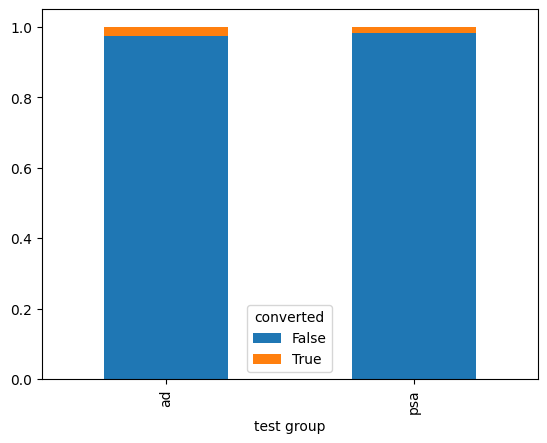

In [47]:
ct_conversion_test_group.plot.bar(stacked= True)

converted        False     True 
most ads day                    
Monday        0.967188  0.032812
Tuesday       0.970160  0.029840
Wednesday     0.975058  0.024942
Sunday        0.975524  0.024476
Friday        0.977788  0.022212
Thursday      0.978429  0.021571
Saturday      0.978949  0.021051


<Axes: xlabel='most ads day'>

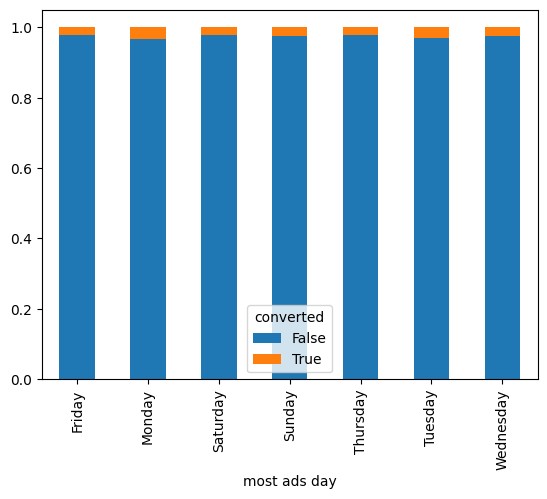

In [48]:
ct_conversion_day = pd.crosstab(data['most ads day'], data['converted'], normalize='index')
print(ct_conversion_day.sort_values(by=True, ascending=False))
ct_conversion_day.plot.bar(stacked= True)

converted         False     True 
most ads hour                    
16             0.969228  0.030772
20             0.970197  0.029803
15             0.970347  0.029653
21             0.971077  0.028923
17             0.971790  0.028210
14             0.971937  0.028063
18             0.972620  0.027380
19             0.973280  0.026720
22             0.973895  0.026105
13             0.975323  0.024677
12             0.976172  0.023828
23             0.977338  0.022662
6              0.977756  0.022244
11             0.977884  0.022116
10             0.978479  0.021521
5              0.979085  0.020915
8              0.980484  0.019516
9              0.980809  0.019191
0              0.981575  0.018425
7              0.981889  0.018111
4              0.984765  0.015235
1              0.987089  0.012911
3              0.989548  0.010452
2              0.992687  0.007313


<Axes: xlabel='most ads hour'>

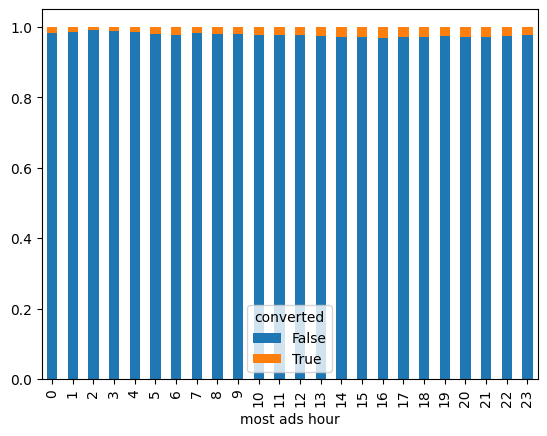

In [49]:
ct_conversion_hour = pd.crosstab(data['most ads hour'], data['converted'], normalize='index')
print(ct_conversion_hour.sort_values(by=True, ascending=False))
ct_conversion_hour.plot.bar(stacked= True)

<Axes: xlabel='converted', ylabel='total ads'>

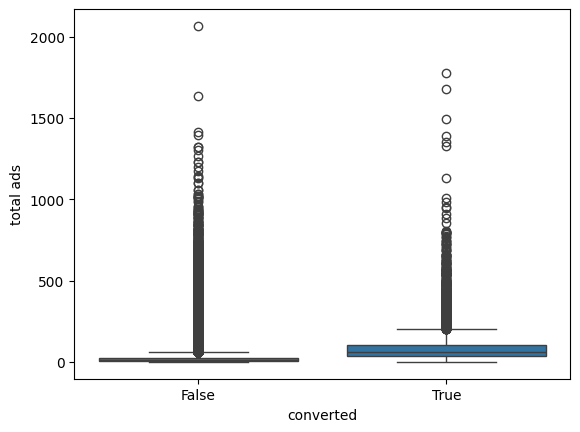

In [50]:
sns.boxplot(x='converted', y='total ads', data=data)

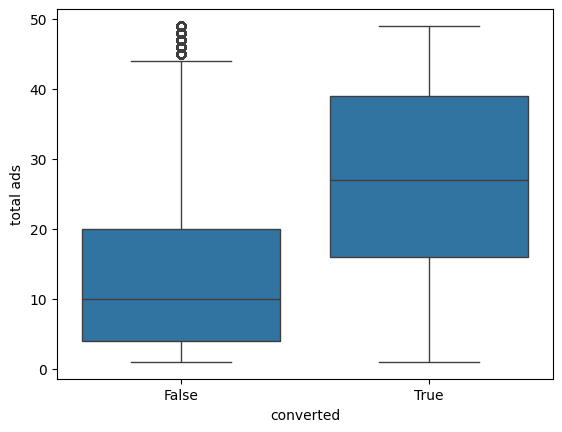

In [51]:
sns.boxplot(x='converted', y='total ads', data=data[data['total ads'] < 50]);

# STATISTICAL TESTS

In [52]:
alpha = 0.5
for var in data_cat.columns:
    if var != 'converted':
        # create a contingency table (cross-tabulation)
        contingeny_table = pd.crosstab(data_cat[var], data_cat['converted'])

        # perform chi-squared test
        chi2, p, _, _ = chi2_contingency(contingeny_table)

        # display the results
        print(f"\nChi-squared test for {var} vs. converted")
        print(f"Chi-squared value: {chi2}")
        print(f"p-value: {p}")

        # check for significance
        if p < alpha:
            print(f"The difference in conversion rates across{var} is statistically significant")
        else:
            print(f"There is no significant difference in conversion rates across {var}")


Chi-squared test for test group vs. converted
Chi-squared value: 54.005823883685245
p-value: 1.9989623063390075e-13
The difference in conversion rates acrosstest group is statistically significant

Chi-squared test for most ads day vs. converted
Chi-squared value: 410.0478857936585
p-value: 1.932184379244731e-85
The difference in conversion rates acrossmost ads day is statistically significant

Chi-squared test for most ads hour vs. converted
Chi-squared value: 430.76869230822086
p-value: 8.027629823696771e-77
The difference in conversion rates acrossmost ads hour is statistically significant


In [53]:
data_cat.columns

Index(['test group', 'converted', 'most ads day', 'most ads hour'], dtype='object')

In [54]:
from scipy. stats import shapiro, levene, ttest_ind, mannwhitneyu

# Step 1
# Normality assumption
shapiro_stat_true, shapiro_p_value_true = shapiro(data[data['converted'] == True]['total ads'])
shapiro_stat_false, shapiro_p_value_false = shapiro(data[data['converted'] == False]['total ads'])

print(f"shapiro-wilk test for normality (True group): p-value = {shapiro_p_value_true}")
print(f"shapiro-wilk test for normality (False group): p-value = {shapiro_p_value_false}")

# Equality of variances assumption
levene_stat, levene_p_value = levene(data[data['converted']]['total ads'], data[~data['converted']]['total ads'])
print(f"Levene's test for equality of variance: p_value = {levene_p_value}")

shapiro-wilk test for normality (True group): p-value = 1.638680987007864e-98
shapiro-wilk test for normality (False group): p-value = 9.883049430733551e-204
Levene's test for equality of variance: p_value = 0.0


In [55]:
# Step 2: Perform a Suitable Test
alpha = 0.5

if shapiro_p_value_true > alpha and shapiro_p_value_false > alpha and levene_p_value > alpha:
    # Assumptions met - use t-test for means
    t_stat, t_p_value = ttest_ind(data[data['converted']]['total ads'], data[~data['converted']]['total ads'])
    print(f"Independent two-sample t-test: p-value = {t_p_value}")
else:
    # Assumptions not met - use use Mann-Whitney U test for medians
    u_stat, u_p_value = mannwhitneyu(data[data['converted']]['total ads'], data[~data['converted']]['total ads'])
    print(f"mann-Whitney U test: p-value = {u_p_value}")

mann-Whitney U test: p-value = 0.0
